<a href="https://colab.research.google.com/github/MoriyaBitton/Economic_Algorithms/blob/main/Ex11_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <u>**Replacement algorithms**

---


##### Economic Algorithms - Ex11 || __Moriya Bitton__ || Ariel University, Winter 2022

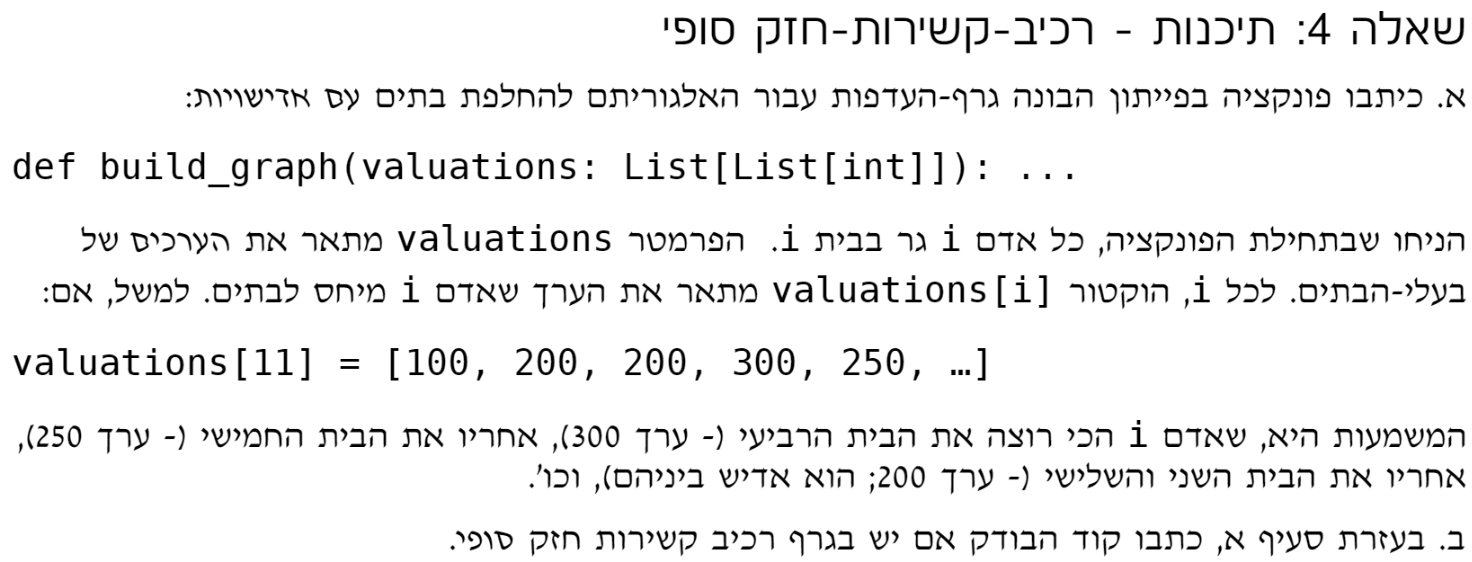

In [319]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### **Graph of preference for the house-swapping algorithm with indifference**

---



---



<u>The nodes are:</u>

* There are 2n nodes, n houses, and n people


<u>A directed edge consists of the following:</u>

* A house [i] to person [i] (who lives there)

* A person [i] to a house [j] he likes the most.




In [320]:
def build_graph(valuations):
    
    # build graph
    G = nx.DiGraph()
    n = len(valuations)
    people = range(n)
    houses = range(n, 2*n)
    G.add_nodes_from(people, label='person')
    G.add_nodes_from(houses, label='house')

    # reset
    for i, lst in enumerate(valuations):
        person = i
        house = i+n
        val = lst[i]
        G.add_edge(house, person, weight=val) 

    # prefers
    for i, lst in enumerate(valuations):
        person = i
        max_val = max(lst)
        for j, val in enumerate(lst):
          if val == max_val:
            max_house = j + n
            G.add_edge(person, max_house, weight=max_val)

    return G

In [321]:
def plot_graph(G):
  pos = nx.spring_layout(G)

  # Extract the nodes that are marked as 'person'
  people = [node for node in G.nodes() if G.nodes[node]['label'] == 'person']

  # Extract the nodes that are marked as 'house'
  houses = [node for node in G.nodes() if G.nodes[node]['label'] == 'house']

  # Draw the 'people' nodes in blue
  nx.draw_networkx_nodes(G, pos, nodelist=people, node_color='yellow', node_size=500)

  # Draw the 'houses' nodes in red
  nx.draw_networkx_nodes(G, pos, nodelist=houses, node_color='red', node_size=500)

  nx.draw_networkx_edges(G, pos)

  labels = {}
  n = (len(G.nodes()) / 2)
  for i,node in enumerate(G.nodes()):
    if i < n:
      labels[node] = f"P {i}"
    else:
      labels[node] = f"H {int(i-n)}"
  nx.draw_networkx_labels(G, pos, labels)
  # nx.draw_networkx_labels(G, pos)

  plt.show()

### **Identify the strongly connected components**

---



---



In [322]:
def strongly_connected_components(G):

  # Find the strongly connected components
  sccs = nx.strongly_connected_components(G)

  # Tarjan's algorithm or DFS algorithm to find all the SCCs
  final_sccs = []
  for scc in sccs:
    
    is_final_scc = True
    for vertex in scc:      

      people = [node for node in scc if G.nodes[node]['label'] == 'person']
      houses = [node for node in scc if G.nodes[node]['label'] == 'house']

      # each 'person' has edge to his 'house'
      if vertex in people:
        has_edge_to_house = False
        for neighbor in G[vertex]:
          if neighbor in houses:
            if vertex in G[neighbor]:
              has_edge_to_house = True
              break      
          if not has_edge_to_house:
            is_final_scc = False
            break
          
      for neighbor in G[vertex]:
        if neighbor not in scc:
          is_final_scc = False
          break
        if not is_final_scc:
          break

    if is_final_scc:
      final_sccs.append(scc)

  return final_sccs

In [323]:
# def identify_sccs(G):
#   # Find the strongly connected components
#   sccs = nx.strongly_connected_components(G)

#   # up then one node
#   sccs = [scc for scc in nx.strongly_connected_components(G) if len(scc) > 1]

#   return sccs

In [324]:
def plot_sccs(G, sccs):
  pos = nx.spring_layout(G)

  for scc in sccs:
      # Create a subgraph of the strongly connected component
      scc_graph = G.subgraph(scc)
      
      people = [node for node in scc if G.nodes[node]['label'] == 'person']
      houses = [node for node in scc if G.nodes[node]['label'] == 'house']

      # Draw the 'people' nodes in blue
      nx.draw_networkx_nodes(scc_graph, pos, nodelist=people, node_color='yellow', node_size=500)

      # Draw the 'houses' nodes in red
      nx.draw_networkx_nodes(scc_graph, pos, nodelist=houses, node_color='red', node_size=500)

      # Draw the edges of the strongly connected component
      nx.draw_networkx_edges(scc_graph, pos)

      labels = {}
      n = (len(G.nodes()) / 2)
      for i,node in enumerate(G.nodes()):
        if i < n:
          labels[node] = f"P {i}"
        else:
          labels[node] = f"H {int(i-n)}"
      nx.draw_networkx_labels(G, pos, labels)
      # nx.draw_networkx_labels(G, pos)

  plt.show()

### **Tests**

---



---



##### Example 1

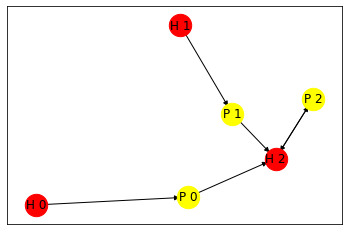

In [325]:
valuations_1 = [[100, 200, 300], [100, 200, 300], [100, 200, 300]]

G_1 = build_graph(valuations_1)

plot_graph(G_1)

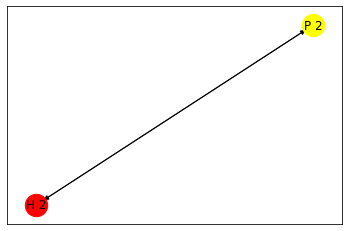

In [326]:
sccs_1 = strongly_connected_components(G_1)

plot_sccs(G_1, sccs_1)

##### Example 2

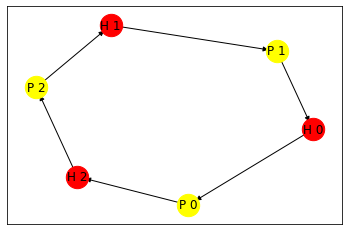

In [327]:
valuations_2 = [[100, 200, 300], [300, 100, 200], [100, 300, 200]]

G_2 = build_graph(valuations_2)

plot_graph(G_2)

In [328]:
sccs_2 = strongly_connected_components(G_2)

plot_sccs(G_2, sccs_2)

##### Example 3

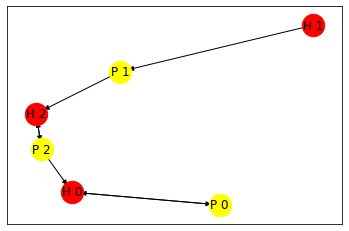

In [329]:
valuations_3 = [[200, 100, 100], [100, 100, 200], [200, 100, 200]]

G_3 = build_graph(valuations_3)

plot_graph(G_3)

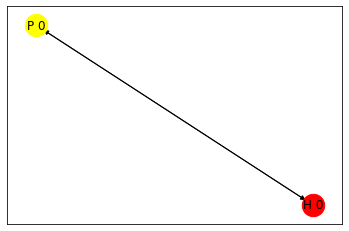

In [330]:
sccs_3 = strongly_connected_components(G_3)

plot_sccs(G_3, sccs_3)